In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
auto = pd.read_csv("Data Python 3/auto/imports-85.data.txt", index_col = None)
auto.shape
# (lihat kolom 15, 26)

(205, 26)

In [50]:
#handling missing value
for i in [1, 5, 18, 19, 21, 22, 25] :
    auto[auto.columns[i]] = np.where(auto[auto.columns[i]] == "?", np.nan, auto[auto.columns[i]])

auto.head()
#convert to float per column
column_float = [1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25]
for i in column_float :
    auto[auto.columns[i]] = auto[auto.columns[i]].astype(float)
    auto[auto.columns[i]] = auto[auto.columns[i]].fillna(auto[auto.columns[i]].mean())

auto.head()

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [27]:
# convert door from categorical to numerical
def doors_num(banyak):
    if banyak == 'four':
        return 4.0
    elif banyak == 'two':
        return 2.0
    else :
        return np.nan

In [28]:
# doors_num('four')
auto['num-of-doors'] = list(map(doors_num, auto['num-of-doors']))
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [9]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [39]:
auto_tugas = auto.iloc[:, [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]]
auto_tugas.head(3)

,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


In [40]:
auto_corr = auto.iloc[:, [21,23, 24, 25]]
auto_corr.head(3)

,horsepower,city-mpg,highway-mpg,price
0,111.0,21.0,27.0,13495.0
1,111.0,21.0,27.0,16500.0
2,154.0,19.0,26.0,16500.0


In [30]:
auto_tugas.isnull().sum()

engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [31]:
auto_tugas.groupby(['engine-type']).describe()

bore                                                    \
             count      mean       std       min       25%       50%   
engine-type                                                            
dohc          12.0  3.403333  0.157672  3.240000  3.270000  3.370000   
dohcv          1.0  3.940000       NaN  3.940000  3.940000  3.940000   
l             12.0  3.526667  0.225563  2.910000  3.460000  3.535000   
ohc          148.0  3.260946  0.260126  2.540000  3.030000  3.190000   
ohcf          15.0  3.644000  0.049685  3.620000  3.620000  3.620000   
ohcv          13.0  3.453846  0.268531  2.680000  3.430000  3.430000   
rotor          4.0  3.329751  0.000000  3.329751  3.329751  3.329751   

                                city-mpg               ...            price  \
                  75%       max    count       mean    ...              75%   
engine-type                                            ...                    
dohc         3.540000  3.630000     12.0  20.000000    ...     18267.500000   
dohcv        3.940000  3.940000      1.0  17.000000    ...     13207.129353   
l            3.700000  3.700000     12.0  24.500000    ...     16943.750000   
ohc          3.437500  3.940000    148.0  26.804054    ...     13325.000000   
ohcf         3.620000  3.740000     15.0  24.466667    ...     11476.500000   
ohcv         3.540000  3.800000     13.0  16.769231    ...     35056.000000   
rotor        3.329751  3.329751      4.0  16.750000    ...     14145.000000   

                          stroke                                          \
                      max  count      mean       std       min       25%   
engine-type                                                                
dohc         35550.000000   12.0  3.283333  0.475955  2.680000  3.070000   
dohcv        13207.129353    1.0  3.110000       NaN  3.110000  3.110000   
l            18150.000000   12.0  3.149167  0.481521  2.190000  3.150000   
ohc          41315.000000  148.0  3.326486  0.236927  2.070000  3.150000   
ohcf         37028.000000   15.0  2.673333  0.137460  2.360000  2.640000   
ohcv         45400.000000   13.0  3.201538  0.197857  2.760000  3.100000   
rotor        15645.000000    4.0  3.255423  0.000000  3.255423  3.255423   

                                           
                  50%       75%       max  
engine-type                                
dohc         3.215000  3.350000  4.170000  
dohcv        3.110000  3.110000  3.110000  
l            3.200000  3.520000  3.520000  
ohc          3.390000  3.460000  3.900000  
ohcf         2.640000  2.640000  2.900000  
ohcv         3.270000  3.270000  3.470000  
rotor        3.255423  3.255423  3.255423  

[7 rows x 72 columns]

In [70]:
from sklearn import preprocessing

# auto_float = auto.iloc[:, [21,23, 24, 25]]
column_float = [1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25]
auto_float = auto.iloc[:, column_float]
# auto_float.isnull().sum()
auto_std_scale = preprocessing.StandardScaler().fit(auto_float)
auto_df_scale = auto_std_scale.transform(auto_float)
auto_df_scale = pd.DataFrame(auto_df_scale)
auto_float

auto_float.corr()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
normalized-losses,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095
compression-ratio,-0.114525,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005201,0.186105,1.000000,-0.205740,-0.435936,0.324701,0.265201,0.070990


Text(-8.7,0.5,'Harga')

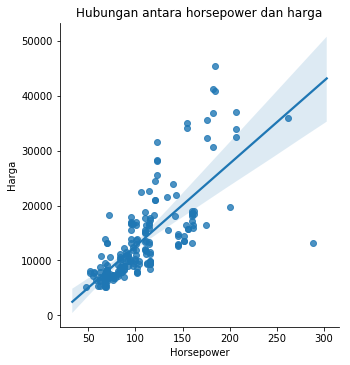

In [47]:
sns.lmplot(x='horsepower', y = 'price', data = auto_tugas, palette = 'Blues')
plt.title('Hubungan antara horsepower dan harga')
plt.axis('tight')
plt.xlabel('Horsepower')
plt.ylabel('Harga')

Text(-17.075,0.5,'Harga')

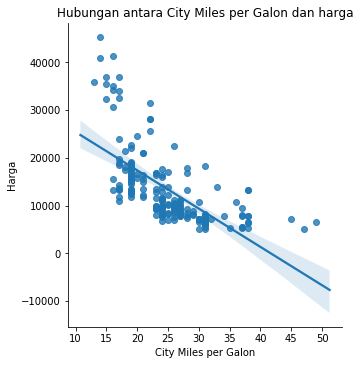

In [48]:
sns.lmplot(x='city-mpg', y = 'price', data = auto_tugas, palette = 'Blues')
plt.title('Hubungan antara City Miles per Galon dan harga')
plt.axis('tight')
plt.xlabel('City Miles per Galon')
plt.ylabel('Harga')

Text(-17.075,0.5,'Harga')

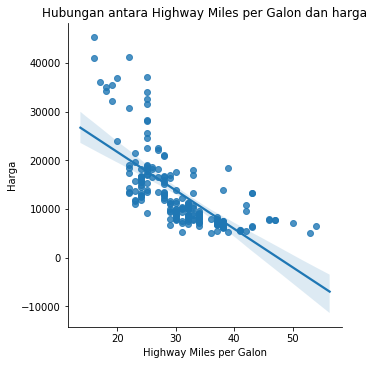

In [49]:
sns.lmplot(x='highway-mpg', y = 'price', data = auto_tugas, palette = 'Blues')
plt.title('Hubungan antara Highway Miles per Galon dan harga')
plt.axis('tight')
plt.xlabel('Highway Miles per Galon')
plt.ylabel('Harga')